# STEP 1 - Importing the dataset
In this step, we will import the dataset and view it

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# STEP 2 - Visualizing the dataset
Now we will plot the dataset to check whether we can observe any relation between the two variables or not

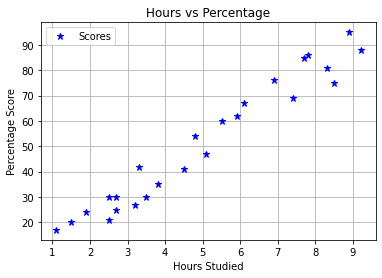

In [3]:
# Plotting the dataset

data.plot(x='Hours', y='Scores', style='*', color='blue', markersize=7)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

# STEP 3 - Data preparation
In this step we will divide the data into "attributes" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [4]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [5]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

# STEP 4 - Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, Y_train)
print("Training complete.")

Training complete.


# STEP 5 - Visualizing the model
After training the model, now its time to visualize it.

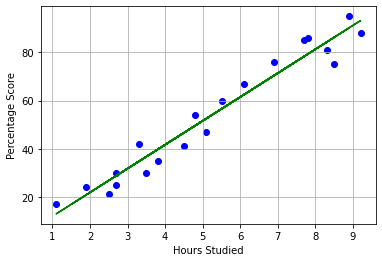

In [7]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

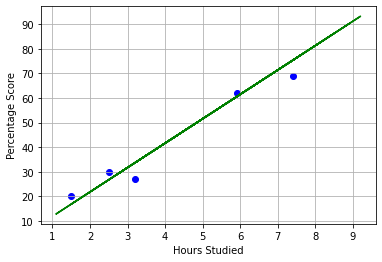

In [8]:
# Plotting for the testing data

plt.scatter(X_test, Y_test, color='blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

# STEP 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
Y_predicted = model.predict(X_test)

In [10]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_predicted})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737538


# STEP 7 - Evaluating the model
In the last step, we are going to evaluate our trained model by calculating mean absolute error

In [12]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Absolute Error: 4.183859899002975
